Step 1: Importing the Libraries

In [72]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

Step 2: Load the Data set


In [73]:
df = pd.read_excel("/content/Telecom.xlsx")

In [74]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [75]:
# shape of the data set
print("The number of rows (observation) is",df.shape[0],'\n',"The number of columns(variables) is",df.shape[1])

The number of rows (observation) is 7043 
 The number of columns(variables) is 21


In [76]:
# Data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [77]:
# Data set duplicate value count

df.duplicated().sum()

0

In [78]:
# Missing value

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

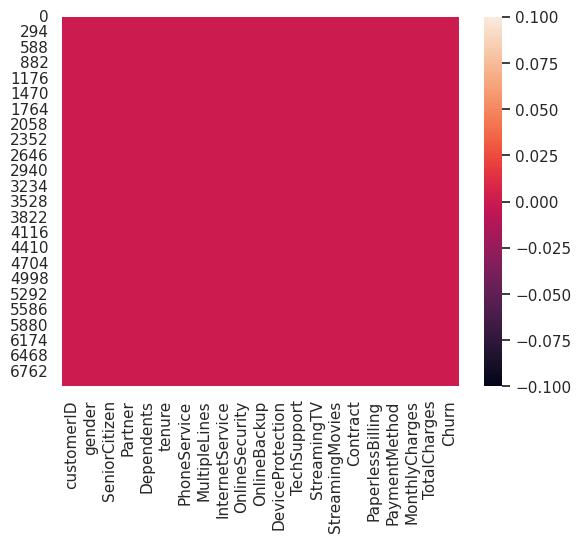

In [79]:
## heat map for missing value representation

sns.heatmap(df.isnull())
plt.show()

In [80]:
# Statistical information of the data set

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Step 3: EDA


In [81]:
# converting total charges object data type to numerical data type

df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)

In [82]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [83]:
## missing value percentage in each column

df.isnull().sum()/len(df)*100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

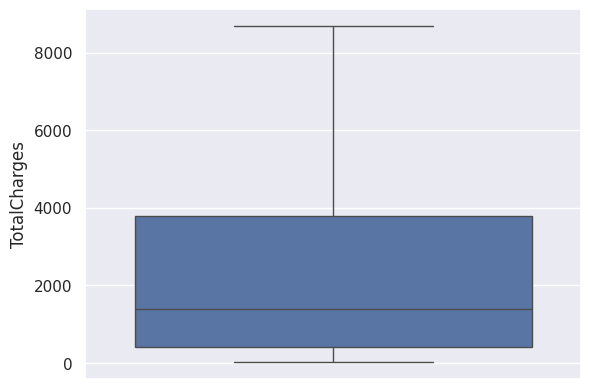

In [84]:
## check for outliers
sns.boxplot(y='TotalCharges' , data=df)
plt.show()

In [85]:
# Missing value imputation

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [86]:
# checking for missing value

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [87]:
# check for unique values in each variable

for i in df.columns:
  print("No. of unique values in ", i, "is", df[i].nunique())

No. of unique values in  customerID is 7043
No. of unique values in  gender is 2
No. of unique values in  SeniorCitizen is 2
No. of unique values in  Partner is 2
No. of unique values in  Dependents is 2
No. of unique values in  tenure is 73
No. of unique values in  PhoneService is 2
No. of unique values in  MultipleLines is 3
No. of unique values in  InternetService is 3
No. of unique values in  OnlineSecurity is 3
No. of unique values in  OnlineBackup is 3
No. of unique values in  DeviceProtection is 3
No. of unique values in  TechSupport is 3
No. of unique values in  StreamingTV is 3
No. of unique values in  StreamingMovies is 3
No. of unique values in  Contract is 3
No. of unique values in  PaperlessBilling is 2
No. of unique values in  PaymentMethod is 4
No. of unique values in  MonthlyCharges is 1585
No. of unique values in  TotalCharges is 6531
No. of unique values in  Churn is 2


In [88]:
# Data Wrangling

print("No. of customer churning :",df[df['Churn']=='Yes'].Churn.count())
churn_df = df[df['Churn']=='Yes']

print("No of unique MultipleLines :",df['MultipleLines'].nunique())
print("No of Customer with InternetService :",df[df['InternetService']=='DSL']['InternetService'].count())
print("No. of customer with PhoneService :",df[df['PhoneService']=='Yes']['PhoneService'].count())
churn_df

No. of customer churning : 1869
No of unique MultipleLines : 3
No of Customer with InternetService : 2421
No. of customer with PhoneService : 6361


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [89]:
# % of total customer churning
print("Total no. of customer :", df.Churn.count())
perc_churn = (len(churn_df)/len(df))*100
print(f"percentage of customer churning :{round(perc_churn, 2)}%")

Total no. of customer : 7043
percentage of customer churning :26.54%


In [90]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [91]:
df['SeniorCitizen'].value_counts()*100.0/len(df)

SeniorCitizen
0    83.785319
1    16.214681
Name: count, dtype: float64

In [92]:
df['Partner'].value_counts()*100.0/len(df)

Partner
No     51.69672
Yes    48.30328
Name: count, dtype: float64

In [93]:
df['Dependents'].value_counts()*100.0/len(df)

Dependents
No     70.041176
Yes    29.958824
Name: count, dtype: float64

In [94]:
df['Churn'].value_counts()*100.0/len(df)

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [95]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [96]:
## Convert categorical column to numerical column

df['Churn'] = np.where(df['Churn']=='Yes',1,0)

In [97]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [98]:
# spilling the data into feature and target variable

x = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [99]:
x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [100]:
# Categorical data are variables that contain label values rather than numeric values.
## one hot emcoding
x = pd.get_dummies(x, columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
                               'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
                               'PaperlessBilling','PaymentMethod'], drop_first=True)

In [101]:
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [102]:
x.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [103]:
# Feature Scaling
# tenure	MonthlyCharges	TotalCharges
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_x = ['tenure','MonthlyCharges','TotalCharges']
x[scaler_x] = scaler.fit_transform(x[scaler_x])

In [104]:
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994971,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,0.066327,-0.259629,-0.173876,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,-1.236724,-0.362660,-0.960399,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.514251,-0.746535,-0.195400,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,-1.236724,0.197365,-0.941193,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [105]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [106]:
# Feature Engineering method along with model building
from sklearn.ensemble import RandomForestClassifier
rf_lable = RandomForestClassifier()
rf_lable.fit(x, y)
df1 = pd.DataFrame({"Feature": x.columns, "RF_importance": rf_lable.feature_importances_}).sort_values(by='RF_importance', ascending=False)
df1

,Feature,RF_importance
3,TotalCharges,0.203934
1,tenure,0.169933
2,MonthlyCharges,0.167505
28,PaymentMethod_Electronic check,0.041887
10,InternetService_Fiber optic,0.039499
4,gender_Male,0.028077
25,Contract_Two year,0.027133
13,OnlineSecurity_Yes,0.025881
26,PaperlessBilling_Yes,0.025411
19,TechSupport_Yes,0.022499


In [107]:
# Feature Engineering method along with model building
from sklearn.ensemble import GradientBoostingClassifier
GB_lable = GradientBoostingClassifier()
GB_lable.fit(x, y)
df2 = pd.DataFrame({"Feature": x.columns, "GB_importance": GB_lable.feature_importances_}).sort_values(by='GB_importance', ascending=False)
df2

,Feature,GB_importance
1,tenure,0.305638
10,InternetService_Fiber optic,0.196804
28,PaymentMethod_Electronic check,0.104534
25,Contract_Two year,0.080170
3,TotalCharges,0.067993
2,MonthlyCharges,0.064400
24,Contract_One year,0.059921
26,PaperlessBilling_Yes,0.019566
13,OnlineSecurity_Yes,0.017257
19,TechSupport_Yes,0.013227


In [108]:
# Feature Engineering method along with model building
from sklearn.tree import DecisionTreeClassifier
dt_lable = DecisionTreeClassifier()
dt_lable.fit(x, y)
df3 = pd.DataFrame({"Feature": x.columns, "dt_importance": dt_lable.feature_importances_}).sort_values(by='dt_importance', ascending=False)
df3

,Feature,dt_importance
1,tenure,0.213853
3,TotalCharges,0.209847
2,MonthlyCharges,0.177734
10,InternetService_Fiber optic,0.108313
28,PaymentMethod_Electronic check,0.027711
4,gender_Male,0.027181
0,SeniorCitizen,0.022125
5,Partner_Yes,0.019201
9,MultipleLines_Yes,0.017811
26,PaperlessBilling_Yes,0.016826


In [109]:
x = x.drop(['DeviceProtection_No internet service'], axis=1)

In [110]:
# Imbalance treatement
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print("Original value count :", y.value_counts())
print("*************SMOTE Method**********************")
print("After Smote value count :", y_smote.value_counts())

Original value count : Churn
0    5174
1    1869
Name: count, dtype: int64
*************SMOTE Method**********************
After Smote value count : Churn
0    5174
1    5174
Name: count, dtype: int64


Step 4:Splitting the data into training and test


In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=101,
                                                    stratify=y_smote)

Step 5: Model Building And Evaluation

In [112]:
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# Evaluation matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("*************classification_report*************")
print(classification_report(y_train, y_pred_train))
print("**************************")
print(classification_report(y_test, y_pred_test))

print("*************accuracy_score*************")
print(accuracy_score(y_train, y_pred_train))
print("**************************")
print(accuracy_score(y_test, y_pred_test))

*************classification_report*************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3881
           1       1.00      1.00      1.00      3880

    accuracy                           1.00      7761
   macro avg       1.00      1.00      1.00      7761
weighted avg       1.00      1.00      1.00      7761

**************************
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1293
           1       0.82      0.85      0.83      1294

    accuracy                           0.83      2587
   macro avg       0.83      0.83      0.83      2587
weighted avg       0.83      0.83      0.83      2587

*************accuracy_score*************
0.9987115062491947
**************************
0.8306919211441824


In [113]:
# CrossValidation method
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rf, x_train, y_train, cv=10)
print(training_accuracy.mean())
print("********************")
print(training_accuracy.max())

0.8344267868752405
********************
0.8481338481338482


In [114]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

# Evaluation matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("*************classification_report*************")
print(classification_report(y_train, y_pred_train_xgb))
print("**************************")
print(classification_report(y_test, y_pred_test_xgb))

print("*************accuracy_score*************")
print(accuracy_score(y_train, y_pred_train_xgb))
print("**************************")
print(accuracy_score(y_test, y_pred_test_xgb))

*************classification_report*************
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3881
           1       0.92      0.96      0.94      3880

    accuracy                           0.94      7761
   macro avg       0.94      0.94      0.94      7761
weighted avg       0.94      0.94      0.94      7761

**************************
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1293
           1       0.80      0.85      0.82      1294

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

*************accuracy_score*************
0.9386676974616673
**************************
0.8167761886354851


In [115]:
# CrossValidation method
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb, x_train, y_train, cv=10)
print(training_accuracy.mean())
print("********************")
print(training_accuracy.max())

0.8230872440923986
********************
0.842985842985843
